<a href="https://colab.research.google.com/github/karen1203/LimpiezaCredicel/blob/main/Propuesta_dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credi= pd.read_excel("cuentas_credicel.xlsx")

In [4]:
credi

folio       tag  folio_solicitud               fecha     marca  \
0          3  HDNAWQ3A               30 2021-11-12 19:00:05       ZTE   
1          4  M418YNR4               33 2021-11-12 19:15:58  MOTOROLA   
2          5  SZ7V3NZT               37 2021-11-13 14:13:08       ZTE   
3          6  9I08UIQZ               38 2021-11-13 15:45:39       ZTE   
4          7  JMF4LKYU               44 2021-11-13 16:10:15  MOTOROLA   
...      ...       ...              ...                 ...       ...   
22730  22967  92KQVRIX            96502 2023-04-18 18:45:00  Motorola   
22731  22968  NWB2EA8J            96479 2023-04-18 18:46:53  Motorola   
22732  22969  VDTRJ2W6            96442 2023-04-18 18:47:47   Samsung   
22733  22970  PETLF56C            96536 2023-04-18 18:49:08   Samsung   
22734  22971  2CI4N2WS            96534 2023-04-18 18:49:39   Samsung   

                             modelo plazo  precio  enganche  descuento  ...  \
0                Blade A3 2020 RO B   26S  1949.0     780.0        0.0  ...   
1      LTE XT2097-12 E7I POWER Azul   13S  2999.0    1050.0        0.0  ...   
2                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0  ...   
3                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0  ...   
4                             G10 B   39S  4299.0    1075.0        0.0  ...   
...                             ...   ...     ...       ...        ...  ...   
22730                      Moto E13   26S  3349.0     297.0        0.0  ...   
22731                     Moto E22i   26S  4100.0    1209.0        0.0  ...   
22732                           A13   26S  4849.0    1152.0        0.0  ...   
22733                        A53 5G   39S  9799.0    2799.0        0.0  ...   
22734                        A22 5G   26S  5399.0    1086.0        0.0  ...   

       fecha_pago_proximo  status_cuenta  puntos     riesgo porc_enganche  \
0                     NaT            NaN     NaN        NaN           NaN   
1                     NaT            NaN     NaN        NaN           NaN   
2                     NaT            NaN     NaN  Cancelado          0.00   
3                     NaT            NaN     NaN        NaN           NaN   
4              2022-03-12           Mora     0.0          0          0.00   
...                   ...            ...     ...        ...           ...   
22730          2023-04-25            NaN     NaN         10         27.40   
22731          2023-04-25            NaN     NaN          9         19.00   
22732          2023-04-25            NaN     NaN         11         26.65   
22733          2023-04-25            NaN     NaN         14        -17.35   
22734          2023-04-25            NaN     NaN         12         21.80   

      porc_tasa  score_buro  razones_buro semana_actual  codigo_postal  
0          0.00         0.0             0             0              0  
1          0.00         0.0             0             0              0  
2          0.00         0.0             0             0            NaN  
3          0.00         0.0             0             0              0  
4          0.00         0.0           NaN           NaN             74  
...         ...         ...           ...           ...            ...  
22730     -1.13         0.0             0   K0,J0,D8,E2              0  
22731      7.48         0.0             0   K0,J0,D8,E2              0  
22732      0.75         0.0             0   K0,D7,F7,D8              0  
22733     -0.14         0.0             0   J0,G1,E0,E2              0  
22734     -2.88         0.0             0            C2              0  

[22735 rows x 33 columns]

In [5]:
credi.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         4197
puntos                3595
riesgo                2473
porc_enganche         2473
porc_tasa                0
score_buro               0
razones_buro          4505
semana_actual         4505
codigo_postal          685
dtype: int64

In [6]:
credi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

No puede haber medio fraudes entonces, entonces la mayoría no tienen ni un fraude, por lo que se llena con la mediana

In [7]:
credi['fraude'].median()

0.0

Como son fechas en desorden no predecibles, por lo que se dejan en fechas desconocidas

In [8]:
credi['fecha_ultimo_pago']=credi['fecha_ultimo_pago'].fillna('Desconocido')

In [9]:
credi['fecha_pago_proximo']=credi['fecha_pago_proximo'].fillna('Desconocido')

Los status de cuenta son Al corriente, Atraso, Mora, Fraude y los espacios en blanco significa que no se ha determinado el estatus, por lo que se deja como "Blanco"

In [10]:
credi['status_cuenta']=credi['status_cuenta'].fillna('Blanco')

Los puntos depende de los clientes y sus situaciones, así que lo hice por el promedio redondeado.

In [11]:
credi["puntos"]=credi["puntos"].fillna(round(credi["puntos"].median(),0))

In [13]:
credi['riesgo'] = credi['riesgo'].replace('Cancelado', 104)
credi['riesgo'] = credi['riesgo'].replace('Fraude', 105)
credi['riesgo'] = credi['riesgo'].replace('Atraso', 106)
credi['riesgo'] = pd.to_numeric(credi['riesgo'])

In [15]:
credi["riesgo"]=credi["riesgo"].fillna(round(credi["riesgo"].median(),0))

In [16]:
credi.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago        0
fecha_pago_proximo       0
status_cuenta            0
puntos                   0
riesgo                   0
porc_enganche         2473
porc_tasa                0
score_buro               0
razones_buro          4505
semana_actual         4505
codigo_postal          685
dtype: int64

In [17]:
credi["porc_enganche"]=credi["porc_enganche"].fillna(round(credi["porc_enganche"].median(),0))

In [18]:
credi["razones_buro"]=credi["razones_buro"].fillna("Desconocido")

In [19]:
credi["razones_buro"]=credi["razones_buro"].fillna("Desconocido")

In [20]:
credi["semana_actual"]=credi["semana_actual"].fillna("Desconocido")

In [21]:
credi["codigo_postal"]=credi["codigo_postal"].fillna("Desconocido")

In [22]:
credi.isnull().sum()

folio                  0
tag                    0
folio_solicitud        0
fecha                  0
marca                  0
modelo                 0
plazo                  0
precio                 0
enganche               0
descuento              0
semana                 0
monto_financiado       0
costo_total            0
monto_accesorios       0
agente_venta           0
dis_venta              0
status                 0
fraude                 0
empresa               13
inversion              0
pagos_realizados       0
reautorizacion         0
fecha_ultimo_pago      0
fecha_pago_proximo     0
status_cuenta          0
puntos                 0
riesgo                 0
porc_enganche          0
porc_tasa              0
score_buro             0
razones_buro           0
semana_actual          0
codigo_postal          0
dtype: int64

In [24]:
from collections import Counter

In [31]:
Counter(credi['empresa'])

Counter({'microtec': 9323,
         'Sistemas': 1,
         'compercel': 174,
         'semfactory': 3,
         'apartacel': 324,
         'aespinosa': 221,
         'procredito': 697,
         'comunicatec': 1020,
         'laragrajales': 24,
         'martz': 14,
         'linetelc': 172,
         'emnagar': 81,
         'servicel': 7348,
         'yaavs': 258,
         'hashtag': 1,
         'texpress': 396,
         'quality': 71,
         'drmedia': 73,
         'crglobal': 153,
         'phuny': 80,
         'alessan': 39,
         'servicelr7': 2,
         'leket': 186,
         'senshi': 5,
         'tucelya': 65,
         'centrocel': 395,
         'fixmobile': 43,
         'ccelular': 32,
         'grupoph': 136,
         'phonepay': 456,
         'telesystems': 156,
         'todocell': 52,
         'maifon': 60,
         'mistraltechnology': 48,
         'arcelular': 171,
         'signumaxis': 35,
         'satelitel': 36,
         'teknosmart': 12,
         'icellpro': 1

In [32]:
credi["empresa"]=credi["empresa"].fillna("microtec")

In [33]:
credi.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
porc_enganche         0
porc_tasa             0
score_buro            0
razones_buro          0
semana_actual         0
codigo_postal         0
dtype: int64

In [34]:
credi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   folio               22735 non-null  int64         
 1   tag                 22735 non-null  object        
 2   folio_solicitud     22735 non-null  int64         
 3   fecha               22735 non-null  datetime64[ns]
 4   marca               22735 non-null  object        
 5   modelo              22735 non-null  object        
 6   plazo               22735 non-null  object        
 7   precio              22735 non-null  float64       
 8   enganche            22735 non-null  float64       
 9   descuento           22735 non-null  float64       
 10  semana              22735 non-null  int64         
 11  monto_financiado    22735 non-null  float64       
 12  costo_total         22735 non-null  int64         
 13  monto_accesorios    22735 non-null  float64   

In [35]:
creedicuanti=credi[['precio','enganche','descuento','semana','monto_financiado','costo_total','monto_accesorios','status','fraude','inversion','pagos_realizados','reautorizacion','puntos','porc_enganche','porc_tasa','score_buro']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7af9423f3d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7af9422382e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7af9423f3ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x7af942238820>,
 'fliers': [<matplotlib.lines.Line2D at 0x7af942238ac0>,
 'means': []}

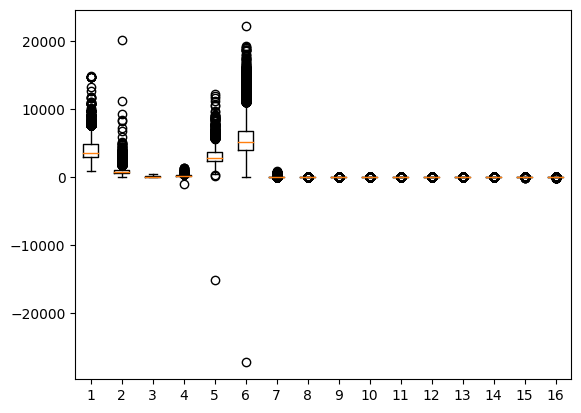

In [36]:
plt.boxplot(creedicuanti)

In [37]:
q1 = creedicuanti['precio'].quantile(0.25)
q2 = creedicuanti['precio'].quantile(0.75)
iqr1 = q2 - q1

lower_bound1 = q1 - 1.5 * iqr1
upper_bound1 = q2 + 1.5 * iqr1


In [38]:
creedicuanti['precio'] = np.where(creedicuanti['precio'] > upper_bound1, upper_bound1, creedicuanti['precio'])

creedicuanti['precio'] = np.where(creedicuanti['precio'] < lower_bound1, lower_bound1, creedicuanti['precio'])

<ipython-input-38-3be10e9433a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['precio'] = np.where(creedicuanti['precio'] > upper_bound1, upper_bound1, creedicuanti['precio'])
<ipython-input-38-3be10e9433a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['precio'] = np.where(creedicuanti['precio'] < lower_bound1, lower_bound1, creedicuanti['precio'])


In [39]:
q3 = creedicuanti['enganche'].quantile(0.25)
q4 = creedicuanti['enganche'].quantile(0.75)
iqr2 = q4 - q3

lower_bound2 = q3 - 1.5 * iqr2
upper_bound2 = q4 + 1.5 * iqr2


In [40]:
creedicuanti['enganche'] = np.where(creedicuanti['enganche'] > upper_bound2, upper_bound2, creedicuanti['enganche'])

creedicuanti['enganche'] = np.where(creedicuanti['enganche'] < lower_bound2, lower_bound2, creedicuanti['enganche'])

<ipython-input-40-9c0f65297628>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['enganche'] = np.where(creedicuanti['enganche'] > upper_bound2, upper_bound2, creedicuanti['enganche'])
<ipython-input-40-9c0f65297628>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['enganche'] = np.where(creedicuanti['enganche'] < lower_bound2, lower_bound2, creedicuanti['enganche'])


In [41]:
q5 = creedicuanti['semana'].quantile(0.25)
q6 = creedicuanti['semana'].quantile(0.75)
iqr3 = q6 - q5

lower_bound3 = q5 - 1.5 * iqr3
upper_bound3 = q6 + 1.5 * iqr3

In [42]:
creedicuanti['semana'] = np.where(creedicuanti['semana'] > upper_bound3, upper_bound3, creedicuanti['semana'])

creedicuanti['semana'] = np.where(creedicuanti['semana'] < lower_bound3, lower_bound3, creedicuanti['semana'])

<ipython-input-42-a1bd1cf4da6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['semana'] = np.where(creedicuanti['semana'] > upper_bound3, upper_bound3, creedicuanti['semana'])
<ipython-input-42-a1bd1cf4da6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['semana'] = np.where(creedicuanti['semana'] < lower_bound3, lower_bound3, creedicuanti['semana'])


In [43]:
q7 = creedicuanti['monto_financiado'].quantile(0.25)
q8 = creedicuanti['monto_financiado'].quantile(0.75)
iqr4 = q7 - q8

lower_bound4 = q7 - 1.5 * iqr4
upper_bound4 = q8 + 1.5 * iqr4

In [44]:
creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] > upper_bound4, upper_bound4, creedicuanti['monto_financiado'])

creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] < lower_bound4, lower_bound4, creedicuanti['monto_financiado'])

<ipython-input-44-6c4aad4e1b1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] > upper_bound4, upper_bound4, creedicuanti['monto_financiado'])
<ipython-input-44-6c4aad4e1b1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_financiado'] = np.where(creedicuanti['monto_financiado'] < lower_bound4, lower_bound4, creedicuanti['monto_financiado'])


In [45]:
q9 = creedicuanti['costo_total'].quantile(0.25)
q10 = creedicuanti['costo_total'].quantile(0.75)
iqr5 = q9 - q10

lower_bound5 = q9 - 1.5 * iqr5
upper_bound5 = q10 + 1.5 * iqr5

In [46]:
creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] > upper_bound5, upper_bound5, creedicuanti['costo_total'])

creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] < lower_bound5, lower_bound5, creedicuanti['costo_total'])

<ipython-input-46-d77bd35ff1bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] > upper_bound5, upper_bound5, creedicuanti['costo_total'])
<ipython-input-46-d77bd35ff1bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['costo_total'] = np.where(creedicuanti['costo_total'] < lower_bound5, lower_bound5, creedicuanti['costo_total'])


In [47]:
q11 = creedicuanti['monto_accesorios'].quantile(0.25)
q12 = creedicuanti['monto_accesorios'].quantile(0.75)
iqr6 = q11 - q12

lower_bound6 = q11 - 1.5 * iqr6
upper_bound6 = q12 + 1.5 * iqr6

In [48]:
creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] > upper_bound6, upper_bound6, creedicuanti['monto_accesorios'])

creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] < lower_bound6, lower_bound6, creedicuanti['monto_accesorios'])

<ipython-input-48-a5dbd5681ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] > upper_bound6, upper_bound6, creedicuanti['monto_accesorios'])
<ipython-input-48-a5dbd5681ea7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creedicuanti['monto_accesorios'] = np.where(creedicuanti['monto_accesorios'] < lower_bound6, lower_bound6, creedicuanti['monto_accesorios'])


In [49]:
cuali=[['folio','tag','folio_solicitud','fecha','marca','modelo','plazo','agente_venta','dis_venta','empresa','fecha_ultimo_pago','fecha_pago_proximo','status_cuenta','razones_buro','semana_actual','codigo_postal','riesgo_categorizado']]

In [50]:
credi= pd.concat([creedicuanti,cuali], axis=1)
credi

TypeError: ignored

In [51]:
credi.to_csv('Propuesta uno')